Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Радует, что тебе удалось разобраться с техникой бутстрапа.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* В работе я оставил несколько советов. Буду рад, если ты учтешь их.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Привет, Артем! Спасибо, что отсмотрел проект) Замечания поправил
</div>

### <font color='orange'>Общее впечатление (ревью 2)</font>
* Проект зачтен!
* Удачи в дальнейшем обучении и следующих работах!

# Проект: Выбор локации для скважины

[yandex_practicum](https://practicum.yandex.ru/trainer/data-scientist/lesson/8a38c35b-48c6-42af-b7ab-00ca6786d6bb/)

## Описание проекта

Сотрудникам добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину. 

Шаги для выбора локации обычно такие:
- В избранном регионе собирают характеристики для скважин: качество нефти и объём её запасов;
- Строят модель для предсказания объёма запасов в новых скважинах;
- Выбирают скважины с самыми высокими оценками значений;

- Определяют регион с максимальной суммарной прибылью отобранных скважин.

В исходных данных предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. 
1) Постройте модель для определения региона, где добыча принесёт наибольшую прибыль. 

2) Проанализируйте возможную прибыль и риски техникой Bootstrap.

### Условия задачи:

- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.
- Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

### Описание данных

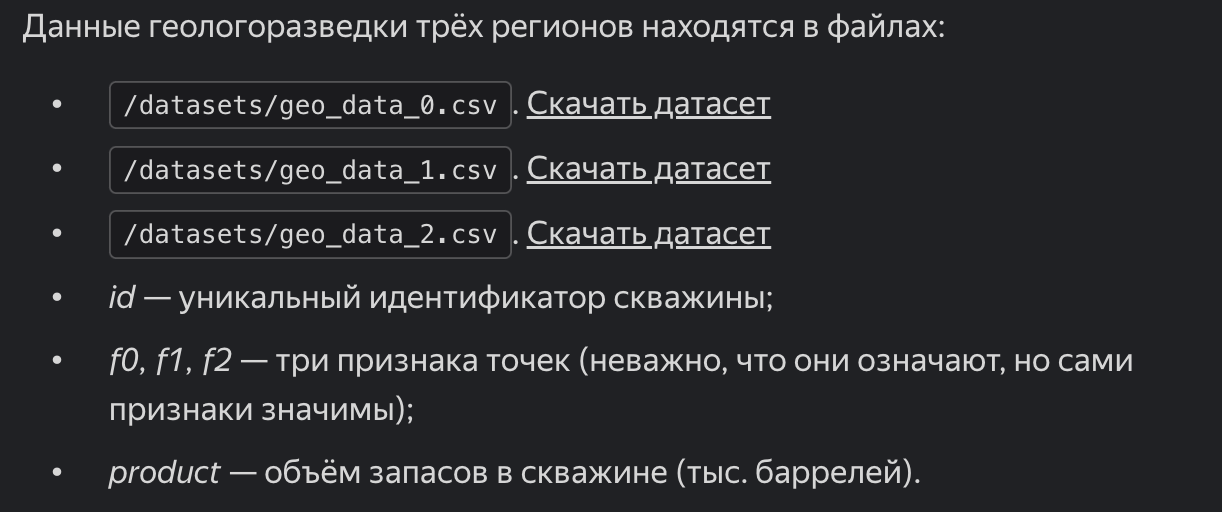

## Нужные библиотеки и загрузка данных

In [1]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math

# библиотеки для статистики
from scipy import stats as st


# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import (StandardScaler, 
                                   MinMaxScaler)




# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error ,mean_absolute_error, r2_score, make_scorer



<div class="alert alert-block alert-info">
<b>Совет: </b> Желательно чтобы собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

Читаем исходные датасеты:

In [2]:
try:
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
except FileNotFoundError:
    data_0 = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/10_ml_business/data/geo_data_0.csv')
    data_1 = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/10_ml_business/data/geo_data_1.csv')
    data_2 = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/10_ml_business/data/geo_data_2.csv')

In [3]:
# функция получения имени датасета

def get_dataset_name(variable):
    import inspect
    frame = inspect.currentframe()
    for scope in [frame.f_back.f_globals, frame.f_back.f_locals]:
        for var_name, var_val in scope.items():
            if isinstance(var_val, pd.DataFrame) and var_val is variable:
                del frame
                return var_name

In [4]:
# функция выбора цвета для текста output 

from IPython.display import Markdown, display

def print_red(text):
    display(Markdown(f'<span style="color:red">{text}</span>'))

In [5]:

for i in range(3):
    df = globals()[f"data_{i}"]
    import inspect
    caller_locals = inspect.currentframe().f_back.f_locals
    dataset_name = get_dataset_name(df)


    print_red(f'Информация по таблице {dataset_name} (Регион № {i})')
    display(df.head())
    print()
    display(df.info())
    print()
    print(f'Число дубликатов в таблице {dataset_name} = {df.duplicated().sum()}')
    

<span style="color:red">Информация по таблице data_0 (Регион № 0)</span>

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Число дубликатов в таблице data_0 = 0


<span style="color:red">Информация по таблице data_1 (Регион № 1)</span>

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Число дубликатов в таблице data_1 = 0


<span style="color:red">Информация по таблице data_2 (Регион № 2)</span>

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None


Число дубликатов в таблице data_2 = 0


Вывод: данные прочитаны, отсмотрены. Пустых значений нет, типы данных соответствуют наполнению, дубликатов нет. 

Перед завершением раздела утащим id в индексы

In [6]:
for i in range(3):
    df = globals()[f"data_{i}"]

    df.set_index('id', inplace=True)
    display(df.head())
    print()

,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305
KcrkZ,-13.081196,-11.506057,4.999415,137.945408
AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910
q6cA6,2.236060,-0.553760,0.930038,114.572842
WPMUX,-0.515993,1.716266,5.899011,149.600746


<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно.
</div>

## Работа с данными

### Анализ данных

#### Построение графиков

Создадим 3 функции:

- вытягивания имени из переменной (для корректного наименования графиков)
- построения гистограммы и boxplot для количественных признаков

- сборная функция построения всей аналитики для любого датасета

In [7]:
# функция получения имени переменной

def get_var_name(var, caller_locals):
    import inspect
    for name, value in caller_locals.items():
        if value is var:
            return name
    return None

In [8]:
# функция для построения гистограммы и boxplot для любого столбца любого датафрейма

def plot_hist_boxplot(some_df, col, col_name, dataset_name):

    df_for_plot= some_df[col]

    # Рассчитываем квартили
    q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    # Создаем новый график
    plt.figure(figsize=(10, 10))

    # Строим гистограмму
    plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
    plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
    plt.title(f'Гистограмма для признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'значения признака {col_name}')
    plt.ylabel(f'Частота')


    # Помечаем квартили на гистограмме
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()

    # Строим график boxplot
    plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
    plt.boxplot(df_for_plot, vert=False)
    plt.title(f'Boxplot признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'Значение признака {col_name}')

    # Помечаем квартили на boxplot
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()


    # Показываем графики
    plt.tight_layout()  # Для автоматического выравнивания графиков
    plt.show()


        

In [9]:
# функция получения аналитических данных для любой таблицы

def analysis_df(some_df: pd.DataFrame, num_list: list):
    # блок вытягивания имени
    import inspect
    caller_locals = inspect.currentframe().f_back.f_locals

    dataset_name = get_var_name(some_df, caller_locals)
    

    print_red(f'Статистический анализ таблицы {dataset_name}')  # печатаем имя таблицы (из переменной)
    display(some_df.describe().T)

    # блок построения гистограмм и диаграмм

    for col in num_list:
        plot_hist_boxplot(some_df=some_df, col_name=col, col=col, dataset_name=dataset_name)


У нас только количественные данные, поэтому сомтреть будем только на гистограммы и boxplot:


<span style="color:red">Статистический анализ таблицы data_0</span>

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.500419,0.871832,-1.408605,-0.072580,0.502360,1.073581,2.362331
f1,100000.0,0.250143,0.504433,-0.848218,-0.200881,0.250252,0.700646,1.343769
f2,100000.0,2.502647,3.248248,-12.088328,0.287748,2.515969,4.715088,16.003790
product,100000.0,92.500000,44.288691,0.000000,56.497507,91.849972,128.564089,185.364347


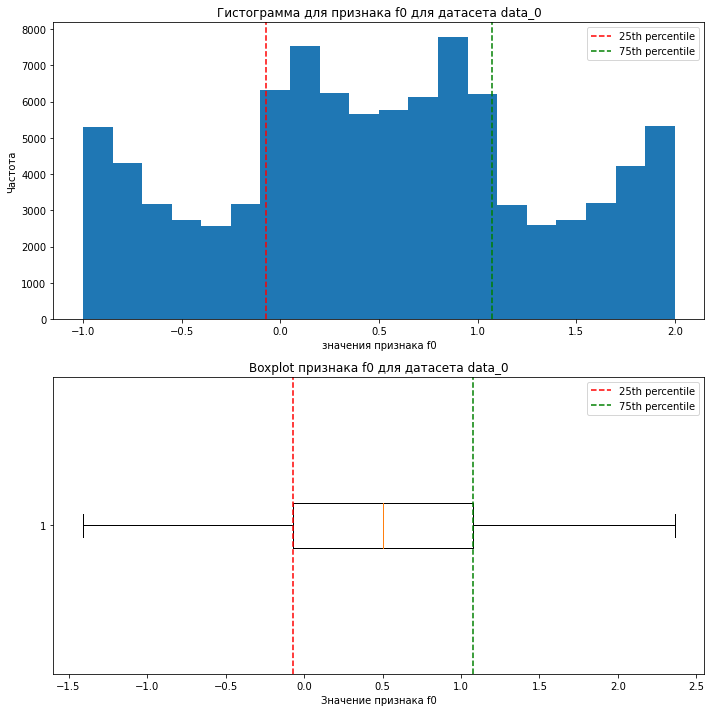

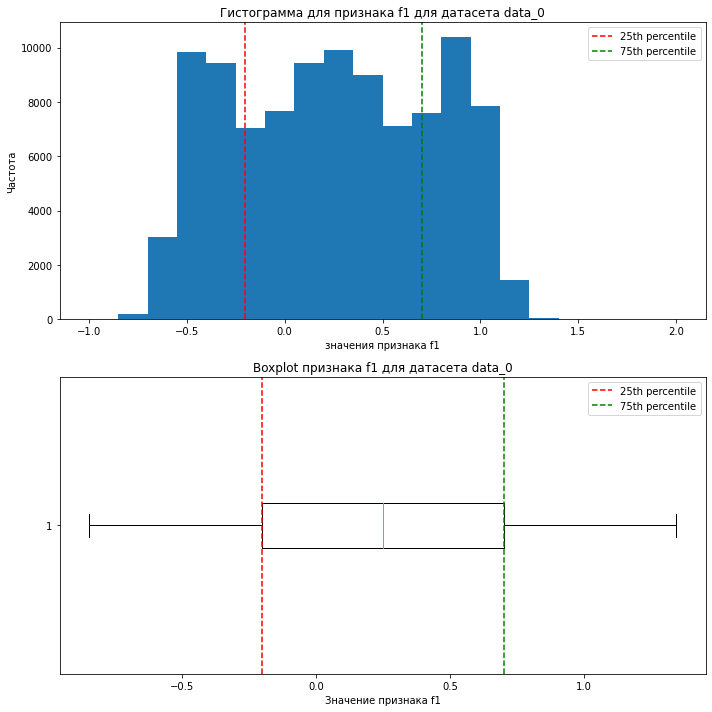

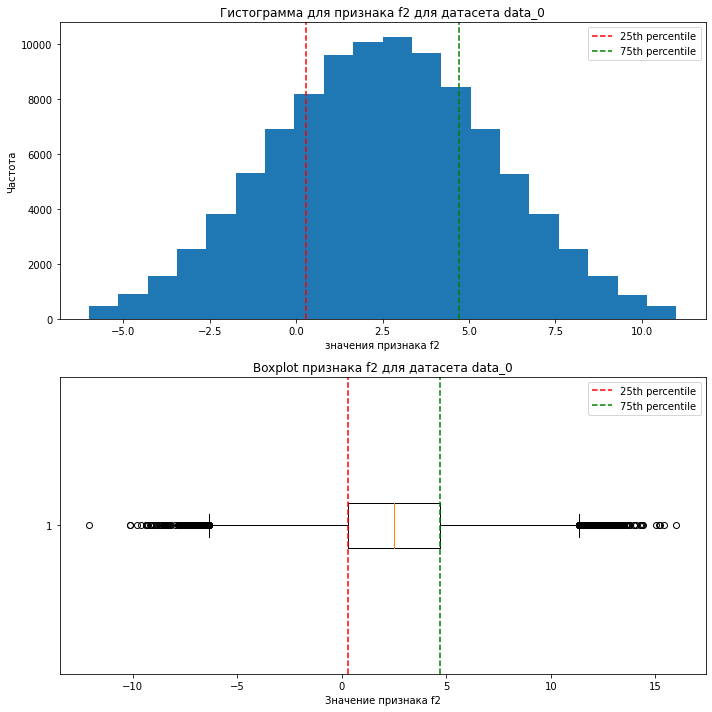

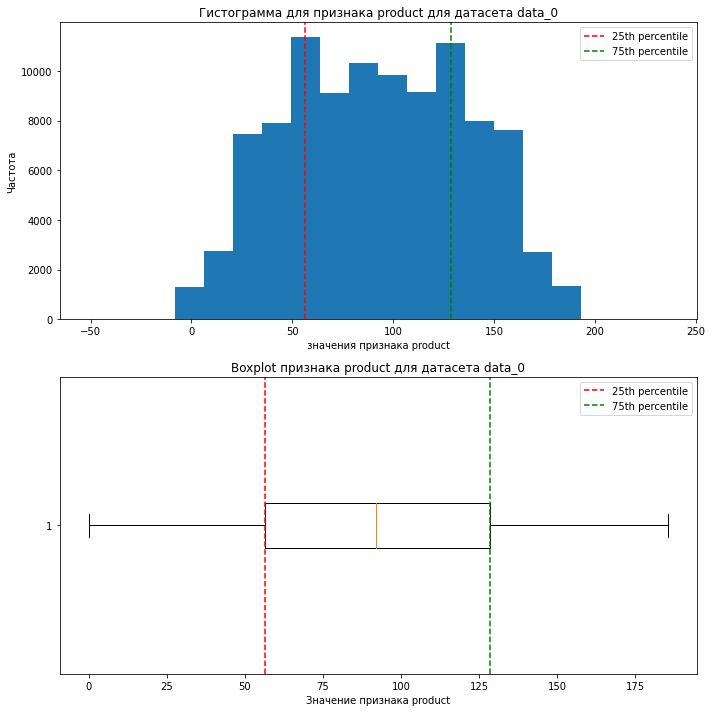

<span style="color:red">Статистический анализ таблицы data_1</span>

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,1.141296,8.965932,-31.609576,-6.298551,1.153055,8.621015,29.421755
f1,100000.0,-4.796579,5.119872,-26.358598,-8.267985,-4.813172,-1.332816,18.734063
f2,100000.0,2.494541,1.703572,-0.018144,1.000021,2.011479,3.999904,5.019721
product,100000.0,68.825000,45.944423,0.000000,26.953261,57.085625,107.813044,137.945408


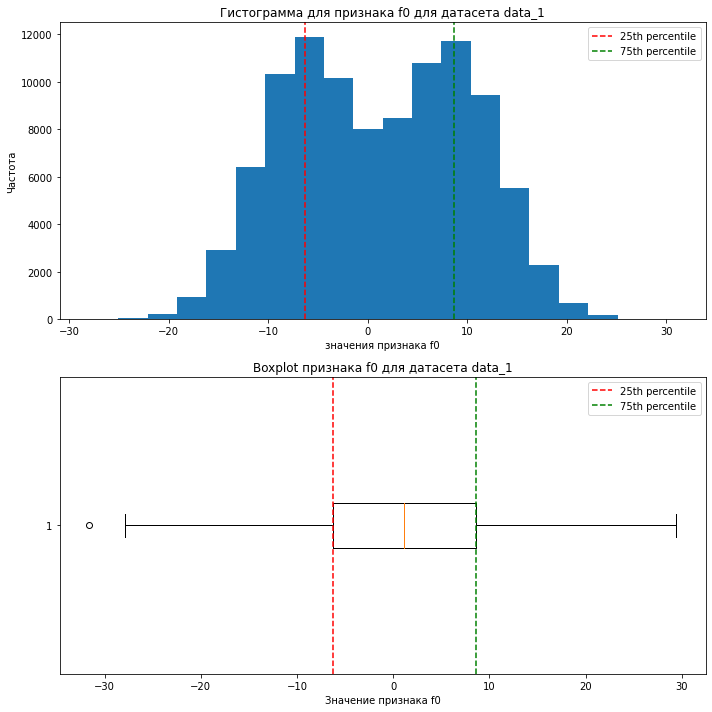

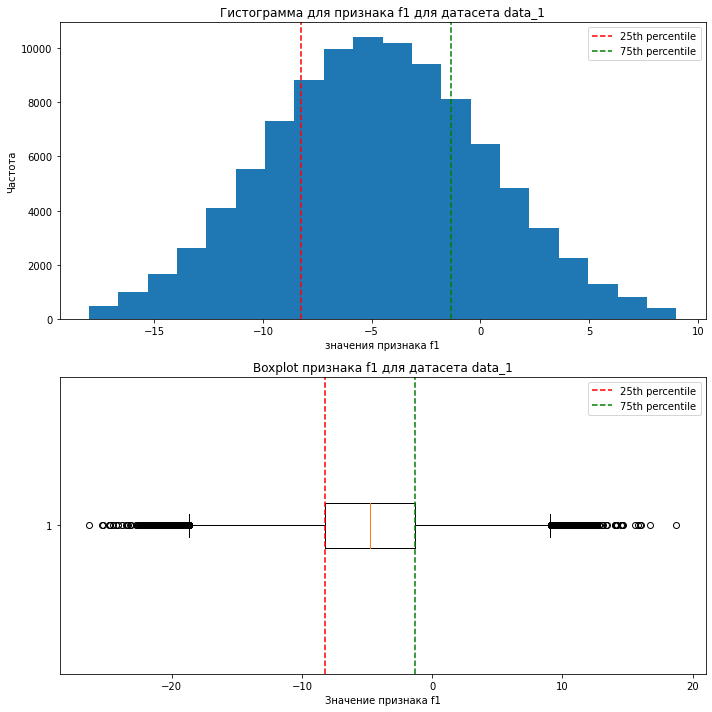

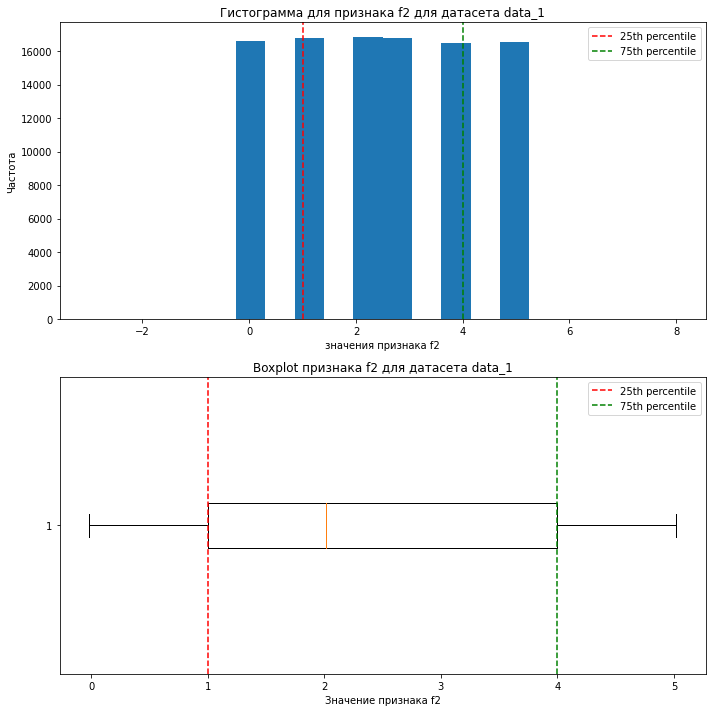

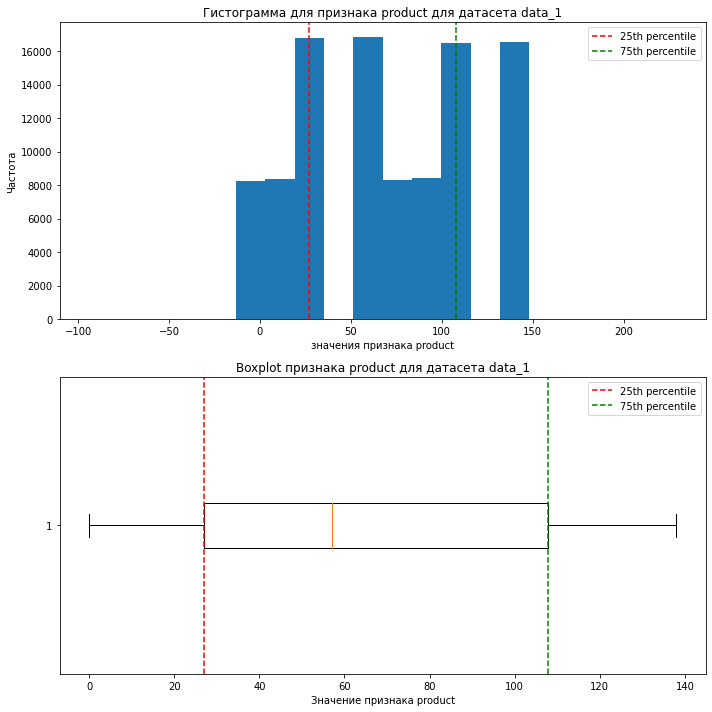

<span style="color:red">Статистический анализ таблицы data_2</span>

,count,mean,std,min,25%,50%,75%,max
f0,100000.0,0.002023,1.732045,-8.760004,-1.162288,0.009424,1.158535,7.238262
f1,100000.0,-0.002081,1.730417,-7.084020,-1.174820,-0.009482,1.163678,7.844801
f2,100000.0,2.495128,3.473445,-11.970335,0.130359,2.484236,4.858794,16.739402
product,100000.0,95.000000,44.749921,0.000000,59.450441,94.925613,130.595027,190.029838


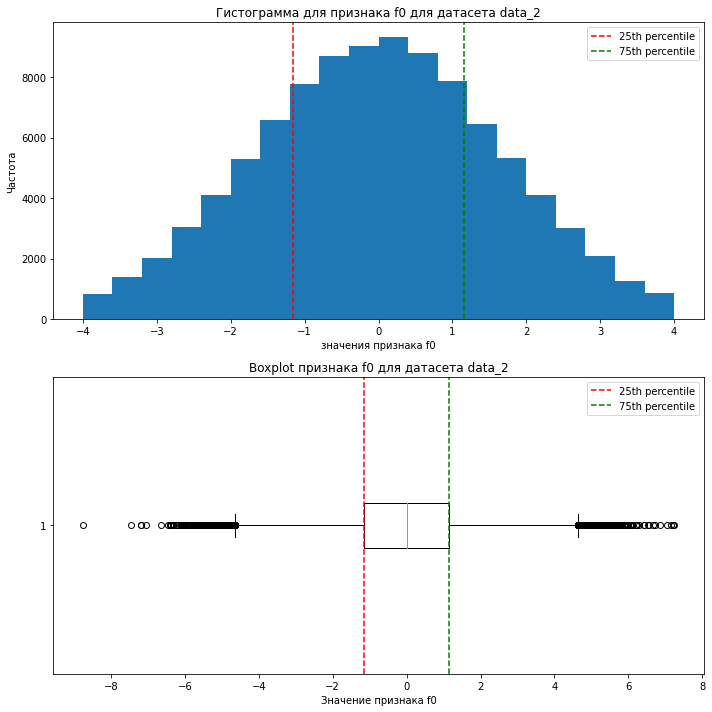

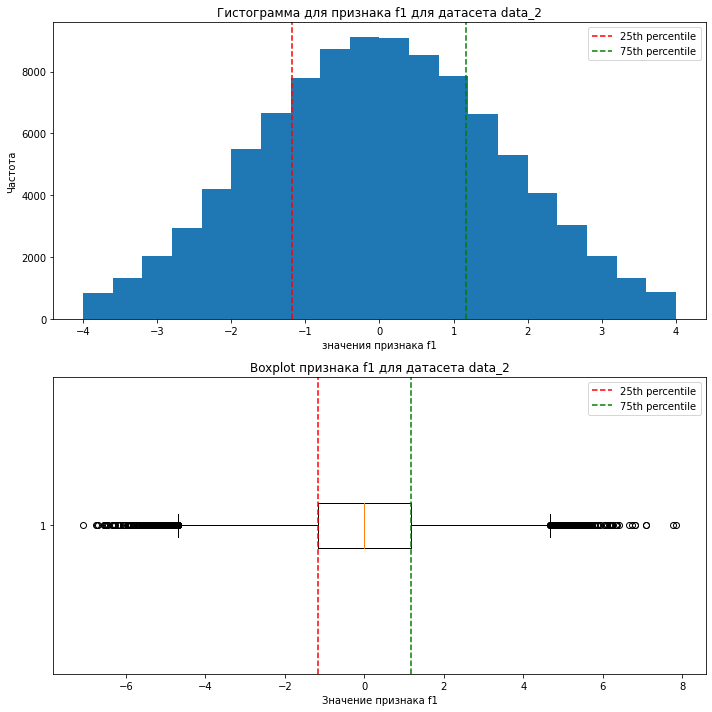

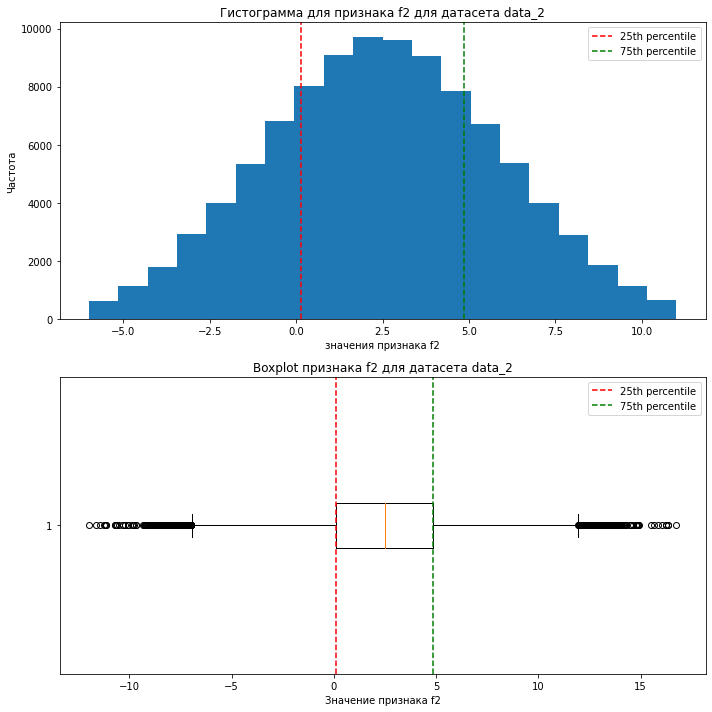

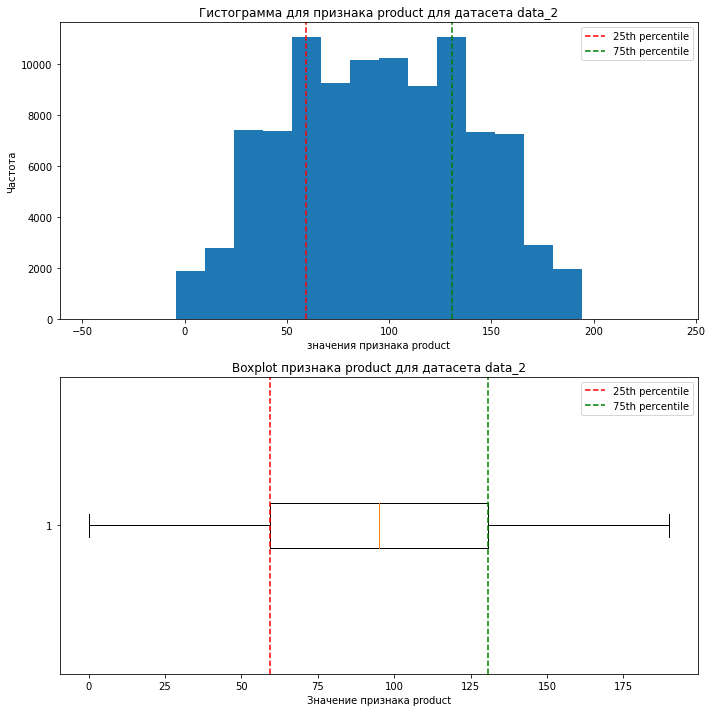

In [10]:
for i in range(3):
    df = globals()[f"data_{i}"]

    # забираем имя датасета
    import inspect
    caller_locals = inspect.currentframe().f_back.f_locals
    dataset_name = get_dataset_name(df)

    analysis_df(df, num_list=df.columns.to_list())


Промежуточные выводы по анализу:

1) датасет 0 :

    - данные распределены нормально, много выбросов в признаке f2 - значения менее -6 и более 11
2) датасет 1:

    - признаки f0, f1 распределены нормально, но у признака f1 много выборосов - значения менее -19 и более 9
    - признак f2 скорее дискретный, принимает в основном значения близкие к 0,1,2,3,4 и 5 - по нему построим круговую диаграмму
    - product тоже как будто принимает довольно определенные значения, отсмотрим его отдельно

3) датасет 2:

    - все признаки распределены нормально, большое число выбросов в f0-f2
    - f0 и f1 выбросы менее -4.2 и более 4.6
    - f2 выбросы менее -6 и более 11.5

#### Дискретные значения

Сначала посмотрим на распределения признаков f2 и  product в датасете 1:

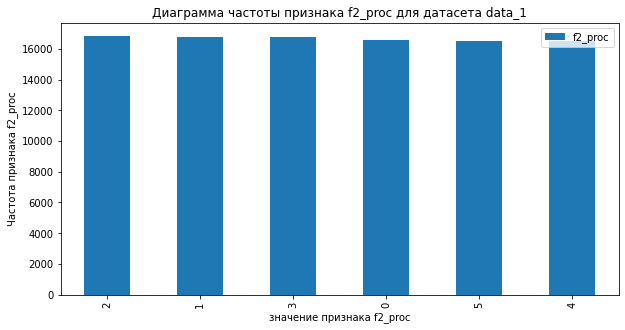

In [11]:
# функция построения столбчатой диаграммы

def barplot_df(dataset, col, col_name, dataset_name):
    dataset[col].value_counts().plot(kind='bar', legend=True, figsize=(10,5))
    plt.title(f'Диаграмма частоты признака {col_name} для датасета {dataset_name}')
    plt.xlabel(f'значение признака {col_name}')
    plt.ylabel(f'Частота признака {col_name}')
    plt.show()


def pie_plot(dataset, col, dataset_name):
    plt.title(f'Круговая диаграмма частоты признака {col} для датасета {dataset_name}')

    palette_color = sns.color_palette('dark')

    # блок получения самого популярного значения
    feat_counts = dataset[col].value_counts()
    # Получение самого частого значения
    most_common_feat = feat_counts.idxmax()


    # Plotting data on chart
    patches, texts, autotexts = plt.pie(feat_counts, 
                                        labels=feat_counts.index, 
                                        explode=(feat_counts.index == most_common_feat) * 0.1,      # взрываем диаграмму - вытаскиваем самое популярное значение
                                        autopct='%1.1f%%', 
                                        startangle=140,
                                        colors=palette_color,
                                        textprops={'color':'white'})

    # Настройка цвета текста на фоне вокруг пирога
    for text in texts:
        text.set_color('black')
    
    plt.show()

def f2_proc(val):
    if val<0.1: return 0
    elif 0.95<val<1.05: return 1 
    elif 1.95<val<2.05: return 2
    elif 2.95<val<3.05: return 3
    elif 3.95<val<4.05: return 4
    elif 4.95<val<5.05: return 5
    else: return -1    

data_1['f2_proc'] = data_1.f2.apply(f2_proc)

barplot_df(data_1, 'f2_proc', 'f2_proc', 'data_1')


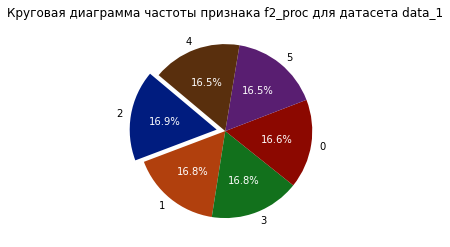

In [12]:
pie_plot(data_1, 'f2_proc', 'data_1')

Проще говоря, причина в том, что данные синтетические - в признак f2 сунули значений, которые около 0,1,2,3,4,5 но разнятся с ними не более 5%.

И поделили их поровну почти что на всех 100_000 наблюдений

Вывод: трогать их не будем

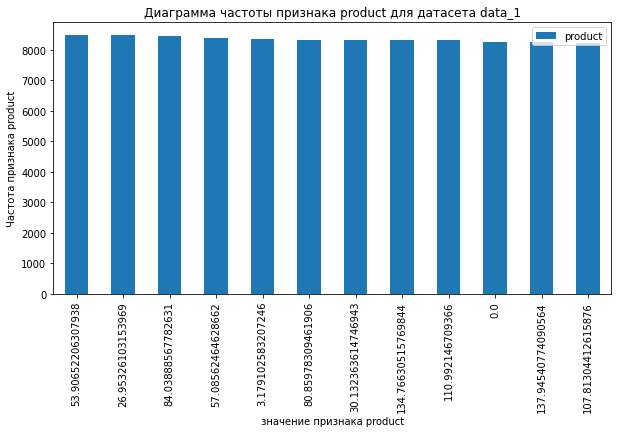

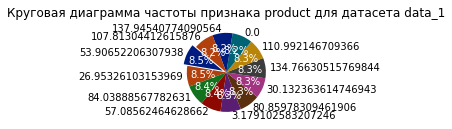

<Figure size 432x288 with 0 Axes>

In [13]:
plt.subplot(1, 1, 1)
barplot_df(data_1, 'product', 'product', 'data_1')

plt.subplot(2, 1, 2) 
pie_plot(data_1, 'product', 'data_1')

plt.tight_layout()  # Для автоматической корректировки расположения графиков
plt.show()

Абсолютно аналогичная ситуация, оставляем без внимания

In [14]:
# удалим новый признак, чтобы не мешался далее

data_1.drop('f2_proc', axis=1, inplace=True)

#### Работа с выбросами

Посмотрим, как быть с выбросами - они могут исказить предсказания линейной модели регрессии

In [15]:
data_0.query('(f2<-6) | (f2>11)').shape

(751, 4)

выбросы в нулевом датасете занимают всего 0.75% 

In [16]:
data_1.query('(f1<-19) | (f1>9)').shape

(592, 4)

выбросы в первом датасете занимают всего 0.6% 

In [17]:
data_2.query('(f1<-4.2) | (f1>4.6) | (f0<-4.2) | (f0>4.6) | (f2<-6) | (f2>11.5)').shape

(3367, 4)

Во втором датасете выбросы побольше - 3.4% 

Вывод по выбросам:

Провести значимую оценку причин возникновения выбросов нет возможности - мы не знаем ни что за признаки, ни какие разумные значения он может принимать.

Но их объем не очень большой, поэтому вряд ли существенно могу повлиять на метрики модели.

Оставим их

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения были визуализированы!
</div>

### Обучение модели на трех регионах и получение метрик

Считать значения будем в цикле - для каждого региона

In [18]:
RANDOM_STATE = 42

In [19]:
# создадим функцию сбора нужных метрик и сбора предсказаний

def linear_results(df):
    # вытягиваем X,y и делим данные на тренировочные и тестовые
    X= df.drop('product', axis=1)
    y= df['product']

    X_train, X_test, y_train, y_test = train_test_split(
                                        X, 
                                        y, 
                                        random_state=RANDOM_STATE,
                                        test_size=0.25)

    # масштабируем входные признаки
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # обучаем модель
    model_lr = LinearRegression(n_jobs=-1)
    model_lr.fit(X_train, y_train)

    # делаем предсказания, считаем метрики
    predictions = model_lr.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions) 
    rmse= mean_squared_error(y_test, predictions, squared=False)

    # считаем медианные значения: истинные и предсказанные
    predicted_median= np.median(predictions)
    true_median = np.median(y_test)

    # считаем средние значения: истинные и предсказанные
    predicted_mean= np.mean(predictions)
    true_mean = np.mean(y_test)

    metrics_dict = {'mae': mae,
            'r2': r2,
            'rmse': rmse,
            'predicted_median':predicted_median,    # предсказанное значение целевого признака (медиана)
            'true_median':true_median,              # истинное значение целевого признака (медиана)
            'predicted_mean':predicted_mean,    # предсказанное значение целевого признака (среднее)
            'true_mean':true_mean}              # истинное значение целевого признака (среднее)
    
    # сохраним в таблицу истинные и предсказанные значения продуктивности скважины
    true_pred_df = y_test.to_frame()
    true_pred_df['predicted_product'] = predictions
    true_pred_df.rename(columns={'product': 'true_product'}, inplace=True)
    
    
    return metrics_dict, true_pred_df            # на выходе соберем словарь метрик и таблицу истинных и предсказанных значений 
                                                # по каждой скважине в регионе

In [20]:
lr_metrics_df = pd.DataFrame()


for i in range(3):
    df = globals()[f"data_{i}"]

    # забираем имя датасета
    import inspect
    caller_locals = inspect.currentframe().f_back.f_locals
    dataset_name = get_dataset_name(df)

    # считаем все метрики в цикле, собираем в словарь 
    # + записываем новые датафреймы истинных и предсказанных значений для каждой скважины в каждом регионе
    data_dict, globals()[f"true_pred_region_{str(i)}"] = linear_results(df)

    # Преобразуем словарь во временный датафрейм
    temp_df = pd.DataFrame(data_dict, index=[f'region_{i}'])

    # собираем в единый датафрейм
    lr_metrics_df = pd.concat([lr_metrics_df, temp_df])

Печатаем метрики по каждому региону

In [21]:
lr_metrics_df

,mae,r2,rmse,predicted_median,true_median,predicted_mean,true_mean
region_0,31.047682,0.272829,37.756600,92.414871,90.785176,92.398800,92.325956
region_1,0.717012,0.999625,0.890280,57.918041,57.085625,68.712878,68.725381
region_2,32.896959,0.196347,40.145872,94.612618,94.936982,94.771024,95.150999


Печатаем 5 первых значений новых датафреймов с истинными и предсказанными значениями по каждому региону

In [22]:
for i in range(3):
    df = globals()[f"true_pred_region_{str(i)}"]
    print_red(f'Датафрейм истинных и предсказанных значений для региона № {i}')
    print(df.head())

<span style="color:red">Датафрейм истинных и предсказанных значений для региона № 0</span>

       true_product  predicted_product
id                                    
7C6bA    122.073350         101.901017
dVxsn     48.738540          78.217774
1Gm3l    131.338088         115.266901
Nzg1t     88.327757         105.618618
Z7b4F     36.959266          97.980185


<span style="color:red">Датафрейм истинных и предсказанных значений для региона № 1</span>

       true_product  predicted_product
id                                    
fYVDK      0.000000           0.844738
3SQcq     53.906522          52.921612
hQ1gJ    134.766305         135.110385
Y4vux    107.813044         109.494863
H1NUw      0.000000          -0.047292


<span style="color:red">Датафрейм истинных и предсказанных значений для региона № 2</span>

       true_product  predicted_product
id                                    
sPjbT    117.441301          98.301916
1u4uo     47.841249         101.592461
kZ6HO     45.883483          52.449099
gCZGK    139.014608         109.922127
rqJHx     84.004276          72.411847


Выводы:
- Ошибки модели на нулевом и втором регионе очень высокие, точность модели - низкая.
- модель на первом регионе показывает хорошие результаты. Но из раздела анализа данных мы знаем, что у целевого признака в этом регионе всего 12 значений. Так что хорошее качество на этом регионе скорее случайно

- при этом данные синтетические, поэтому значительно улучшить модель на текущих исходных данных не получится

<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции и циклы. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

### Подготовка к расчету прибыли

Итак, наша цель:
- взять информацию о реальной продуктивности скважин в каждом регионе
- наложить на них предсказанные значения продуктивности
- выбрать по 200 самых продуктивных скважин из каждого региона, исходя именно из предсказанных значений
- взять реальные (истинные) значения продуктивности 
- посчитать истинную прибыль по каждой скважине в каждом регионе

- просуммировать прибль по каждому региону, сравнить с бюджетом 

Исходные данные

In [23]:
# исходные данные
budget = 10_000_000_000         # бюджет
num_wells = 200                 # число скважин в регионе
rev_per_1000_bar = 450_000        # доход в руб за 1_000 баррелей

Считаем достаточное число добычи со скважины, чтобы считать ее безубыточной:
- берем бюджет на регион
- делим его на число скважин в регионе, на которые тратим бюджет
- делим результат на прибыль с единицы (с 1000 баррелей)

In [24]:
profitable_amount_product_per_well = budget/ num_wells / rev_per_1000_bar
print(f'Безубыточная добыча со скважины составляет {int(profitable_amount_product_per_well)} тыс. баррелей ')

Безубыточная добыча со скважины составляет 111 тыс. баррелей 


<div class="alert alert-block alert-info">

<b>Совет: </b> В названиях константных переменных лучше использовать только БОЛЬШИЕ буквы. Это соглашение между программистами: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html#id29 .
</div>

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

Функция подсчета прибыли

In [25]:
# функция подсчета прибыли
def revenue(true_pred_df, number_of_wells, rev_per_unit):
    sorted_df = true_pred_df.sort_values(by='predicted_product', 
                                         ascending= False)[:number_of_wells]    # сортируем продуктивность по предсказанным значениям,
                                                                                # отбираем заданное число скважин

    return sorted_df.true_product.sum() * rev_per_unit -  budget    # выводим сумму продуктивности заданного числа скважин, 
                                                                     # умноженную на доход с единицы продуктивности
                                                                     # за вычетом затрат на разработку (бюджет)

<div class="alert alert-block alert-info">
<b>Совет: </b> Эту функцию лучше было бы назвать profit, так как revenue – это выручка.
</div>

Считаем прибыль на 200 лучших скважинах согласно предсказаниям по каждому региону:

In [26]:
for i in range(3):
    df = globals()[f"true_pred_region_{str(i)}"]
    print(f'Ожидаемая прибыль по региону № {i} составляет', 
          f'{round(revenue(df, number_of_wells=num_wells, rev_per_unit=rev_per_1000_bar)/10**9, 2)} млрд. рублей'
                )
    print()

Ожидаемая прибыль по региону № 0 составляет 3.36 млрд. рублей

Ожидаемая прибыль по региону № 1 составляет 2.42 млрд. рублей

Ожидаемая прибыль по региону № 2 составляет 2.6 млрд. рублей



Сравниваем среднюю истинную и предсказанную продуктивность с безубыточной

In [27]:
lr_metrics_df['profitable_product'] = profitable_amount_product_per_well
lr_metrics_df[['predicted_mean', 'true_mean', 'profitable_product']]

,predicted_mean,true_mean,profitable_product
region_0,92.398800,92.325956,111.111111
region_1,68.712878,68.725381,111.111111
region_2,94.771024,95.150999,111.111111


Промежуточные выводы:
1) Пока ни один регион не показывает достаточных ожидаемых результатов по средней добыче на скважине для безубыточности

2) однако, ожидаемая прибыль по каждому региону с учетом предсказаний положительная

Будем считать риски по технологии бутстреп (многократного сэмплирования)

### Подсчет рисков и прибыли с технологией бутстреп

На старте выбора региона берут 500 скважин, из которых потом отбирают 200 с наилучшими показателями (по условиям задачи)

Функция подсчета прибыли и рисков:
1) на входе получит датафрейм с предсказаниями, число скважин на старте = 500, число скважин c наилучшими показателями, прибыль с единицы продуктивности

2) на выходе функция вернет:
    - среднее значение прибыли после сэмплирования
    - рисков убыточности (как отношение числа убыточных сценариев к общему числу сценариев при сэмплировании)
    - 95% доверительный интервал прибыли (между 0.25 и 0.975 квантилями распределения прибыли)

In [28]:
state = np.random.RandomState(12345)    # зададим для создания уникальных датасетов при сэмплировании

def calculate_risks_revenues(true_pred_df, number_of_wells, rev_per_unit, basic_num_wells =500):
    # создаем контейнер для прибыли
    revenues = []

    # запускаем бутстреп на 1000 повторений
    for i in range(1000):
        sampled_df = true_pred_df.sample(n=basic_num_wells,replace=True, random_state=state)
        sampled_revenue = revenue(true_pred_df=sampled_df, number_of_wells=number_of_wells,rev_per_unit=rev_per_unit)
        revenues.append(sampled_revenue)
        
    revenues = pd.Series(revenues)  # оборачиваем в серию для удобства

    # считаем значения, собираем в словарь
    mean_rev = round(revenues.mean()/10**9, 2)  # среднее значение прибыли

    risks = revenues.loc[lambda x: x<0].count() / revenues.count() * 100    # риск получения прибыли меньше 0 (убыток)

    confidence_interval = ([revenues.quantile(0.025), revenues.quantile(0.975)],)  # 95% доверительный интервал
    
    result_dict = {'mean_rev, bln_rub': mean_rev,
                   'risk, %': round(risks, 1),
                   '95%_confidence_interval' : confidence_interval
    }

    return result_dict

Создаем датафрейм с результатами для каждого региона

In [29]:
regions_res_df = pd.DataFrame()


for i in range(3):
    df = globals()[f"true_pred_region_{i}"]


    # считаем все данные в словарь для каждого региона
    data_dict = calculate_risks_revenues(true_pred_df= df,
                        number_of_wells = num_wells, 
                        rev_per_unit= rev_per_1000_bar, 
                        basic_num_wells =500)

    # Преобразуем словарь во временный датафрейм
    temp_df = pd.DataFrame(data_dict, index=[f'region_{i}'])

    # собираем в единый датафрейм
    regions_res_df= pd.concat([regions_res_df, temp_df])

In [30]:
regions_res_df

,"mean_rev, bln_rub","risk, %",95%_confidence_interval
region_0,0.41,6.7,"[-117742136.49486831, 911737050.7514055]"
region_1,0.44,1.6,"[35728489.280851334, 828006639.0043902]"
region_2,0.39,7.8,"[-164785166.1090443, 888206234.1976783]"


Вывод: 
1) при сэмплировании данных по регионам 1000 раз с отбором 500 скважин на регион получилась следующая картина:
    - регион №0 и №2 показали повышенный риск убыточности  при разработке скважин 
    - 95% доверительные интервалы прибыли по левому краю имеют значительные отрицательные значения: -0.13 и - 0.17 млрд руб соответственно

2) Регион 1 показал более надежную картину: 
    - низкий риск не более 2%
    - положительную левую границу доверительного интервала: 36 млн руб
    - самую высокую среднюю ожидаемую прибыль

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>


<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

## Общий вывод по проекту

1) На входе были изучены данные по трем регионам в целях определения перспективного места для бурения скважин на нефтяном месторождении

    - данные синтетичны
    
    - имеют выбросы, взаимосвязь между признаками определить невозможно ввиду конфиденциальности данных (что в них скрыто)
    - данные нормально распределены, не имеют пропусков

2) Обучение линейной модели на данных:

    - показало довольно низкие результаты на 0 и 2 регионах
    
    - показало хорошие результаты в регионе №1. Но на этапе Анализа данных определено, что у целевого признака в этом регионе всего 12 значений. Так что хорошее качество на этом регионе скорее случайно


3) Информация для бизнеса:

    - математически выведено, что точка безубыточности по продуктивности скважины составляет 111 тыс баррелей
    - ни один регион на текущий момент не соответствует точке безубыточности по средней продуктивности на скважинах
    - ожидаемая прибыль с учетом предсказаний обученной модели положительная для всех 3 регионов от 2,5 до 3,5 млрд руб
    - статистические данные подтверждают среднюю положительную прибыль для всех трех регионов примерно 0,4 млрд руб

    - однако, расчет рисков и доверительных интервалов говорит о высокой вероятности получить убыток в 0 и 2 регионе

Итоговый вывод: учитывая все вышеперечисленное, рекомендуется выполнить бурение скважин в регионе №1 



<div class="alert alert-block alert-danger">
<b>Ошибка:</b> необходимо сделать вывод предполагая что данные корректны.
</div>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Поправил - добавил позитива)
</div>